In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Data/customer_churn_large_dataset.xlsx')
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


### Visualizing the Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,100000.0,50000.500000,28867.657797,1.0,25000.75,50000.50,75000.25,100000.0
Age,100000.0,44.027020,15.280283,18.0,31.00,44.00,57.00,70.0
Subscription_Length_Months,100000.0,12.490100,6.926461,1.0,6.00,12.00,19.00,24.0
Monthly_Bill,100000.0,65.053197,20.230696,30.0,47.54,65.01,82.64,100.0
Total_Usage_GB,100000.0,274.393650,130.463063,50.0,161.00,274.00,387.00,500.0
Churn,100000.0,0.497790,0.499998,0.0,0.00,0.00,1.00,1.0


In [22]:
data.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [9]:
data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

C:\Users\Pulkit Gaur\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


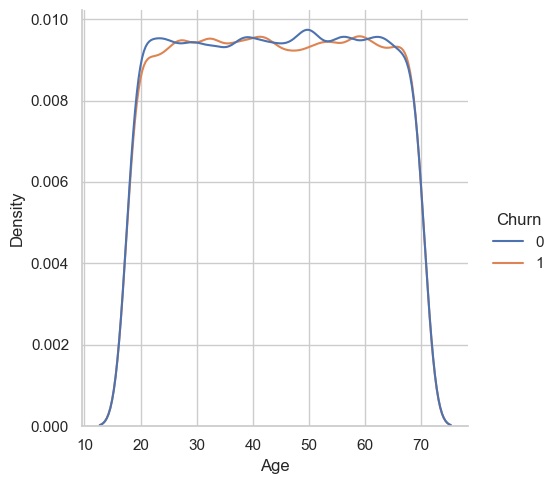

In [10]:
sns.displot(data=data, x=data['Age'], hue=data["Churn"], kind='kde')

We can see that the Columns are farely distributed in dataset so there no much requirement for complex preprocessing the data

C:\Users\Pulkit Gaur\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


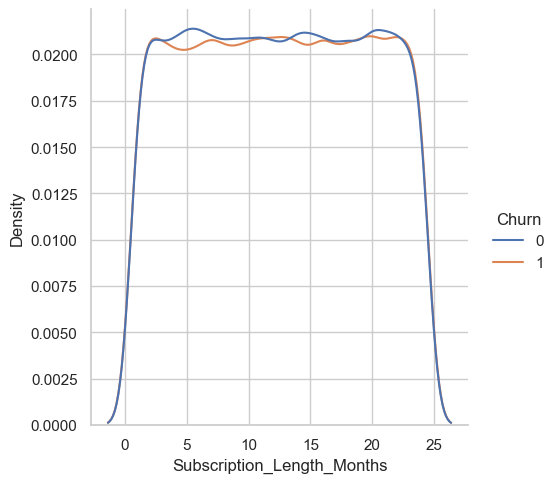

In [11]:
sns.displot(data=data, x=data['Subscription_Length_Months'], hue=data["Churn"], kind='kde')

C:\Users\Pulkit Gaur\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


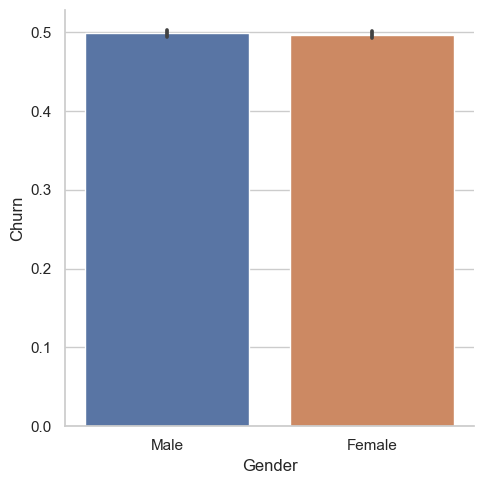

In [25]:
sns.catplot(data, x='Gender', y="Churn", kind='bar')

C:\Users\Pulkit Gaur\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


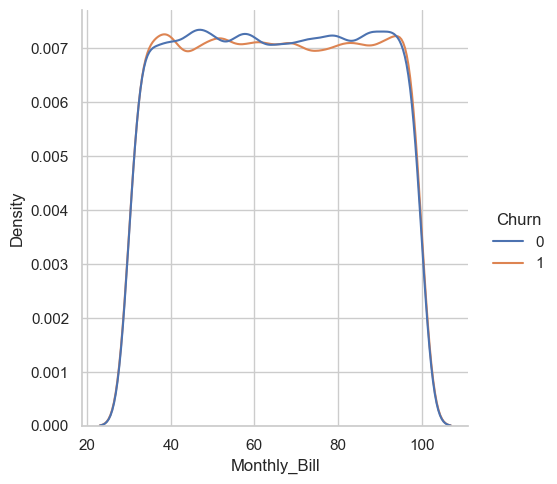

In [12]:
sns.displot(data=data, x=data['Monthly_Bill'], hue=data["Churn"], kind='kde')

C:\Users\Pulkit Gaur\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


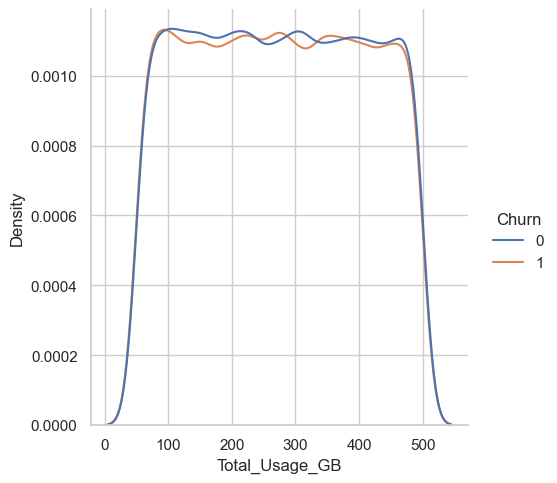

In [58]:

sns.displot(data=data, x=data['Total_Usage_GB'], hue=data["Churn"], kind='kde')

C:\Users\Pulkit Gaur\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


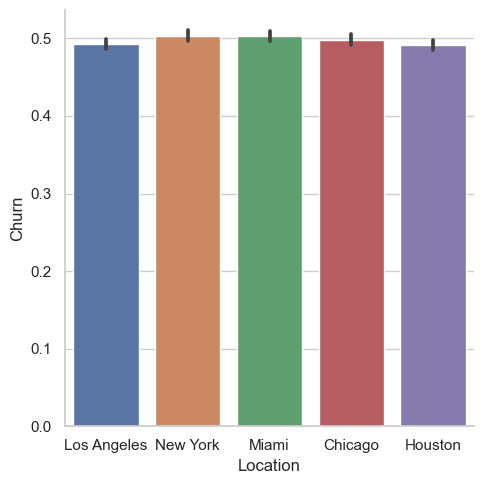

In [37]:
sns.catplot(data, x='Location', y="Churn", kind='bar')

C:\Users\Pulkit Gaur\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


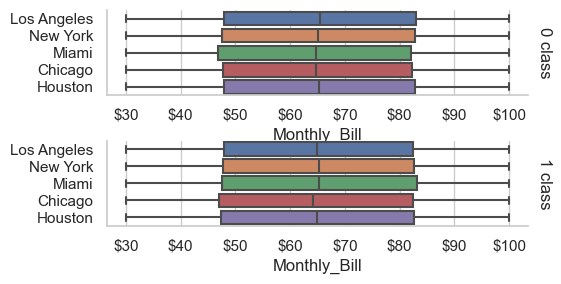

In [34]:
g = sns.catplot(
    data=data,
    x="Monthly_Bill", y="Location", row="Churn",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Monthly_Bill", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

C:\Users\Pulkit Gaur\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


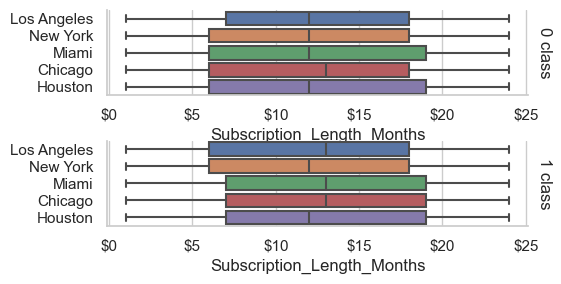

In [35]:
g = sns.catplot(
    data=data,
    x="Subscription_Length_Months", y="Location", row="Churn",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Subscription_Length_Months", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

C:\Users\Pulkit Gaur\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


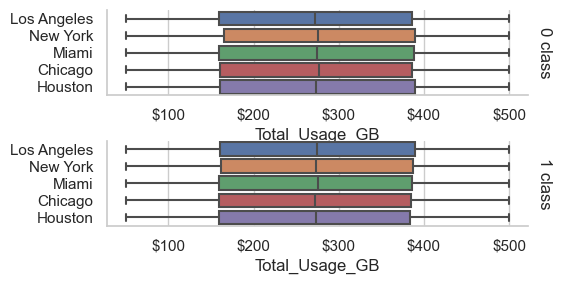

In [59]:

g = sns.catplot(
    data=data,
    x="Total_Usage_GB", y="Location", row="Churn",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Total_Usage_GB", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

### Proprocessing the Data

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
# Separate features and target variable
X = data.drop(["CustomerID", "Name", "Churn"], axis=1)
y = data["Churn"]


In [ ]:
# Define columns for different preprocessing steps
numeric_cols = ["Age", "Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB"]
categorical_cols = ["Gender", "Location"]
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [19]:
import joblib
joblib.dump(preprocessor, 'Pickle Files/processor.joblib')

['Pickle Files/processor.joblib']

In [16]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train = preprocessor.fit_transform(X_train)

In [9]:
X_test = preprocessor.fit_transform(X_test)

### Training the Model on Multiple Algorithms 

In [101]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

modelnames = [
 'DummyClassifier()', 
 'KNeighborsClassifier()',
 'LogisticRegression(max_iter=1000)',
 'SGDClassifier()',
 'SVC()',
 'DecisionTreeClassifier()',
 'XGBClassifier()',
 'CatBoostClassifier()',
 'MLPClassifier((11, 11), activation="identity")'
]

metricnames = [
 'accuracy_score',
 'precision_score',
 'recall_score',
 'f1_score',
 'roc_auc_score'
]

metrics = pd.DataFrame(index=modelnames, columns=metricnames)

for modelname in modelnames:
    model = eval(modelname)
    pred_test = model.fit(X_train, y_train).predict(X_test)
    for metricname in metricnames:
        if metricname == 'roc_auc_score':
            metrics.loc[modelname, metricname] = eval(f'{metricname}(y_test, pred_test)')
        else:
            metrics.loc[modelname, metricname] = eval(f'{metricname}(y_test, pred_test)')


C:\Users\Pulkit Gaur\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.06692
0:	learn: 0.6931237	total: 165ms	remaining: 2m 44s
1:	learn: 0.6930565	total: 179ms	remaining: 1m 29s
2:	learn: 0.6930456	total: 189ms	remaining: 1m 2s
3:	learn: 0.6930046	total: 202ms	remaining: 50.3s
4:	learn: 0.6929412	total: 216ms	remaining: 42.9s
5:	learn: 0.6928955	total: 227ms	remaining: 37.7s
6:	learn: 0.6928422	total: 241ms	remaining: 34.2s
7:	learn: 0.6928031	total: 253ms	remaining: 31.4s
8:	learn: 0.6927692	total: 266ms	remaining: 29.3s
9:	learn: 0.6927300	total: 278ms	remaining: 27.5s
10:	learn: 0.6926817	total: 288ms	remaining: 25.9s
11:	learn: 0.6926009	total: 298ms	remaining: 24.5s
12:	learn: 0.6925743	total: 308ms	remaining: 23.4s
13:	learn: 0.6925203	total: 319ms	remaining: 22.5s
14:	learn: 0.6924776	total: 330ms	remaining: 21.7s
15:	learn: 0.6924238	total: 341ms	remaining: 20.9s
16:	learn: 0.6923834	total: 351ms	remaining: 20.3s
17:	learn: 0.6923315	total: 364ms	remaining: 19.8s
18:	learn: 0.6922927	total: 378ms	remaining: 19.5s
19:	learn:

In [102]:
metrics

,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
DummyClassifier(),0.50395,0.0,0.0,0.0,0.5
KNeighborsClassifier(),0.4986,0.494616,0.495414,0.495015,0.498575
LogisticRegression(max_iter=1000),0.5033,0.499133,0.377079,0.429605,0.502311
SGDClassifier(),0.50635,0.502196,0.55317,0.526452,0.506717
SVC(),0.5013,0.496937,0.433323,0.462955,0.500767
DecisionTreeClassifier(),0.50135,0.497381,0.497732,0.497557,0.501322
XGBClassifier(),0.49725,0.493165,0.487249,0.490189,0.497172
CatBoostClassifier(),0.498,0.493683,0.468703,0.480869,0.49777
"MLPClassifier((11, 11), activation=""identity"")",0.5036,0.499483,0.340691,0.405081,0.502323


#### You Can Easily See the Models which are performing Best 

In [103]:
metrics.sort_values('accuracy_score', axis=0, ascending=True).head()

,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
XGBClassifier(),0.49725,0.493165,0.487249,0.490189,0.497172
CatBoostClassifier(),0.498,0.493683,0.468703,0.480869,0.49777
KNeighborsClassifier(),0.4986,0.494616,0.495414,0.495015,0.498575
SVC(),0.5013,0.496937,0.433323,0.462955,0.500767
DecisionTreeClassifier(),0.50135,0.497381,0.497732,0.497557,0.501322


### Trying the Model with PCA 

In [14]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)

In [15]:
X_test_pca = pca.fit_transform(X_test)

In [110]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

modelnames = [
 'DummyClassifier()', 
 'KNeighborsClassifier()',
 'LogisticRegression(max_iter=1000)',
 'SGDClassifier()',
 'SVC()',
 'DecisionTreeClassifier()',
 'XGBClassifier()',
 'CatBoostClassifier()',
 'MLPClassifier((11, 11), activation="identity")'
]

metricnames = [
 'accuracy_score',
 'precision_score',
 'recall_score',
 'f1_score',
 'roc_auc_score'
]

metrics_pca = pd.DataFrame(index=modelnames, columns=metricnames)

for modelname in modelnames:
    model = eval(modelname)
    pred_test = model.fit(X_train_pca, y_train).predict(X_test_pca)
    for metricname in metricnames:
        if metricname == 'roc_auc_score':
            metrics_pca.loc[modelname, metricname] = eval(f'{metricname}(y_test, pred_test)')
        else:
            metrics_pca.loc[modelname, metricname] = eval(f'{metricname}(y_test, pred_test)')


C:\Users\Pulkit Gaur\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.06692
0:	learn: 0.6931127	total: 16.4ms	remaining: 16.4s
1:	learn: 0.6930530	total: 31ms	remaining: 15.5s
2:	learn: 0.6930151	total: 45.4ms	remaining: 15.1s
3:	learn: 0.6929589	total: 58.8ms	remaining: 14.6s
4:	learn: 0.6929100	total: 73.8ms	remaining: 14.7s
5:	learn: 0.6928411	total: 89.4ms	remaining: 14.8s
6:	learn: 0.6927941	total: 104ms	remaining: 14.7s
7:	learn: 0.6927430	total: 118ms	remaining: 14.7s
8:	learn: 0.6927269	total: 133ms	remaining: 14.6s
9:	learn: 0.6926896	total: 148ms	remaining: 14.7s
10:	learn: 0.6926496	total: 163ms	remaining: 14.7s
11:	learn: 0.6926188	total: 178ms	remaining: 14.6s
12:	learn: 0.6925816	total: 191ms	remaining: 14.5s
13:	learn: 0.6925306	total: 205ms	remaining: 14.5s
14:	learn: 0.6925048	total: 219ms	remaining: 14.4s
15:	learn: 0.6924504	total: 234ms	remaining: 14.4s
16:	learn: 0.6924147	total: 246ms	remaining: 14.2s
17:	learn: 0.6923757	total: 262ms	remaining: 14.3s
18:	learn: 0.6923241	total: 275ms	remaining: 14.2s
19:	lear

In [111]:
metrics_pca.sort_values('accuracy_score', axis=0, ascending=True).head()

,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
KNeighborsClassifier(),0.49565,0.491683,0.494607,0.493141,0.495642
"MLPClassifier((11, 11), activation=""identity"")",0.4967,0.494213,0.62403,0.551586,0.497698
DecisionTreeClassifier(),0.4971,0.494249,0.593388,0.5393,0.497855
SGDClassifier(),0.4979,0.495206,0.629876,0.554481,0.498934
LogisticRegression(max_iter=1000),0.50095,0.496101,0.384739,0.433381,0.500039


### Deep Learning Models

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [65]:
data = pd.read_excel("Data/customer_churn_large_dataset.xlsx")
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [91]:
# Separate features and target variable
X = data.drop(["CustomerID", "Name", "Churn"], axis=1)
y = data["Churn"]


In [92]:
# Columns to be scaled
numeric_cols = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Columns to be one-hot encoded
categorical_cols = ['Gender', 'Location']

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [93]:
processor_deploy = preprocessor.fit(X)

In [95]:
joblib.dump(processor_deploy, "Pickle Files/dep_processor.jb")

['Pickle Files/dep_processor.jb']

In [78]:
X = preprocessor.transform(X)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from tensorflow import keras
from tensorflow.keras import layers

In [81]:
gpus = tensorflow.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tensorflow.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tensorflow.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [82]:
X_train.shape

(80000, 11)

In [83]:
input_dim = X_train.shape[1]

# Create a sequential model
model = keras.Sequential()

# Add input layer
model.add(layers.Input(shape=(input_dim,)))  # Input features the number of inputs expected by the Model

# Add fully connected (dense) layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))  # Dropout for regularization
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))  # Dropout for regularization
# Add output layer with sigmoid activation (for binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[keras.metrics.BinaryAccuracy()])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [84]:
import time

In [85]:
name = f"Churn-Model-ANN-{int(time.time())}"

In [86]:
tensor_callbacks = tensorflow.keras.callbacks.TensorBoard(log_dir=f'logs/{name}')

In [88]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test) ,callbacks=[tensor_callbacks])

Epoch 1/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.6932 - binary_accuracy: 0.5011 - val_loss: 0.6933 - val_binary_accuracy: 0.4997
Epoch 2/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.6933 - binary_accuracy: 0.5005 - val_loss: 0.6931 - val_binary_accuracy: 0.5031
Epoch 3/10
2500/2500 [==============================] - 11s 5ms/step - loss: 0.6932 - binary_accuracy: 0.5009 - val_loss: 0.6932 - val_binary_accuracy: 0.5002
Epoch 4/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6932 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.5028
Epoch 5/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.6932 - binary_accuracy: 0.5008 - val_loss: 0.6931 - val_binary_accuracy: 0.5045
Epoch 6/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.6932 - binary_accuracy: 0.5018 - val_loss: 0.6931 - val_binary_accuracy: 0.5043
Epoch 7/10
2500/2500 [========================

In [96]:
model.save(f'Models/{name}')

INFO:tensorflow:Assets written to: Models/Churn-Model-ANN-1693242575\assets


In [97]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.6932 - binary_accuracy: 0.4961


[0.6931573152542114, 0.49605000019073486]

In [99]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss : ', f"{loss:.2f}%")
print("Accuracy : ", f"{accuracy * 100:.2f}%")

625/625 [==============================] - 2s 3ms/step - loss: 0.6932 - binary_accuracy: 0.4961
Loss :  0.69%
Accuracy :  49.61%
